In [ ]:
# Hi Shruthi. You can start working on the project here to ensure a smooth mentoring.
# Also, this is a chance to explore Colab. You can work here in the same way as you would with Jupyter.

In [2]:
# Load data from local drive. Execute this code to import the dataset from your local environment.

from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


In [3]:
# Later execute the following code snippet to import it into a pandas dataframe.
import pandas as pd
import io

netflix_df = pd.read_csv(io.BytesIO(uploaded['netflix_data.csv']))
print(netflix_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [4]:
#Filter data to remove TV shows
netflix_subset = netflix_df[netflix_df["type"] != "TV Show"]

In [5]:
#subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
netflix_movies = netflix_df[netflix_df["type"] == "Movie"][["title", "country", "genre", "release_year", "duration"]]
print(netflix_movies.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [6]:
#movies that are strictly shorter than 60 minutes
short_movies = netflix_movies[netflix_movies["duration"]<60 ]
print(short_movies.head())

                                                 title        country  \
35                                           #Rucker50  United States   
55                 100 Things to do Before High School  United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                  3 Seconds Divorce         Canada   
146                                     A 3 Minute Hug         Mexico   

             genre  release_year  duration  
35   Documentaries          2016        56  
55   Uncategorized          2014        44  
67   Uncategorized          2017        37  
101  Documentaries          2018        53  
146  Documentaries          2019        28  


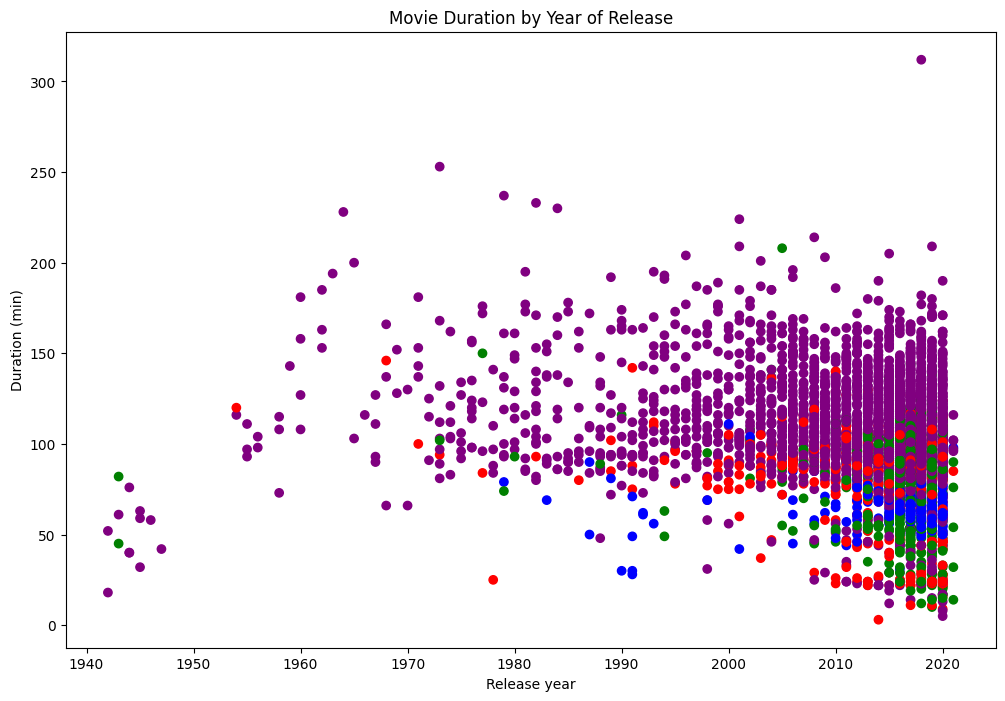

In [7]:
# assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else)
import matplotlib.pyplot as plt

colors = []
for index, row in netflix_movies.iterrows():
  genre = row['genre']
  if 'Children' in genre:
    colors.append('red')
  elif 'Documentaries' in genre:
    colors.append('green')
  elif 'Stand-Up' in genre:
    colors.append('blue')
  else:
    colors.append('purple')

# Inspect the first 10 values in your list
colors[:10]

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)

# Create a title and axis labels
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [8]:
#"Are we certain that movies are getting shorter?"
answer = 'NO'